# Exercise
### At the same level as this notebook on github,there is an Exercise folder that contains carprices.csv.This file has car sell prices for 3 different models.First plot data points onascatter plot chart to see if linear regression model can be applied.If yes,then build a model that can answer following questions.
1. Predict price ofamercedez benz that is4yr old with mileage 45000
2. Predict price ofaBMW X5 that is7yr old with mileage 86000
3. Tell me the score(accuracy)of your model.(Hint:use Linear Regression().score())

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## 1. Lets first check can we apply linear regression model on it or not with the help of scatter plot.

<AxesSubplot:xlabel='Mileage', ylabel='Sell Price($)'>

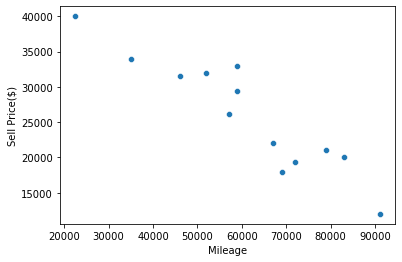

In [4]:
sns.scatterplot(x = "Mileage", y = "Sell Price($)",data=df)

<AxesSubplot:xlabel='Mileage', ylabel='Sell Price($)'>

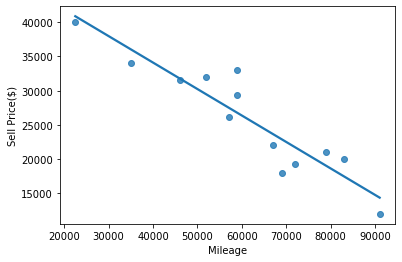

In [6]:
sns.regplot(x = "Mileage", y = "Sell Price($)",data=df,ci = None)

## So as we can see we can

## First convert Car Model categories into dummy variables

In [7]:
new_data = pd.get_dummies(df["Car Model"])
new_data

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


### Concat this to orignal data

In [9]:
conc = pd.concat([df,new_data],axis=1)
conc

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


## Drop Car Model column and one of dummies columns

In [10]:
final = conc.drop(['Car Model','Mercedez Benz C class'],axis= 1)
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


## Let's build the model

In [12]:
model = LinearRegression()

## Select X and Y

In [14]:
X = final.drop(['Sell Price($)'],axis=1).values
X

array([[69000,     6,     0,     1],
       [35000,     3,     0,     1],
       [57000,     5,     0,     1],
       [22500,     2,     0,     1],
       [46000,     4,     0,     1],
       [59000,     5,     1,     0],
       [52000,     5,     1,     0],
       [72000,     6,     1,     0],
       [91000,     8,     1,     0],
       [67000,     6,     0,     0],
       [83000,     7,     0,     0],
       [79000,     7,     0,     0],
       [59000,     5,     0,     0]], dtype=int64)

In [15]:
y = final['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [16]:
model.fit(X,y)

LinearRegression()

### Prediction

1. Predict price of a mercedez benz that is 4yr old with mileage 45000


In [25]:
model.predict([[45000,4,0,0]])

array([36991.31721061])

In [32]:
p1 = model.predict([[45000,4,0,0]])
print(f'So the Price of a mercedez benz that is 4yr old with mileage 45000 is {round(float(p1),2)}$.')

So the Price of a mercedez benz that is 4yr old with mileage 45000 is 36991.32$.


2. Predict price of a BMW X5 that is 7yr old with mileage 86000

In [28]:
model.predict([[86000,7,0,1]])

array([11080.74313219])

In [31]:
p2 = model.predict([[86000,7,0,1]])
print(f'So the Price of a BMW X5 that is 7yr old with mileage 86000 is {float(p2)}$.')

So the Price of a BMW X5 that is 7yr old with mileage 86000 is 11080.743132190648$.


3. Tell me the score(accuracy)of your model.(Hint:use Linear Regression().score())

In [19]:
model.score(X,y)

0.9417050937281083

In [29]:
s = model.score(X,y)
print(f'The Accuracy Score for this model is {s}.')

The Accuracy Score for this model is 0.9417050937281083.


# Lets use sklearns one code encoding 

In [35]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


## First  to use label encoder

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()

In [37]:
df['Car Model'] = le.fit_transform(df['Car Model'])

In [38]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [39]:
X = df.drop(['Sell Price($)'],axis=1).values
X

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]], dtype=int64)

In [40]:
y = df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [41]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [42]:
ct = ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder='passthrough')

In [43]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

### Drop one of dummies column

In [44]:
X = X[:,1:]
X

array([[1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [45]:
model = LinearRegression()

In [46]:
model.fit(X,y)

LinearRegression()

1. Predict price of a mercedez benz that is 4yr old with mileage 45000


In [47]:
model.predict([[0,1,45000,4]])

array([36991.31721062])